In [2]:
import pydicom as dicom
import pydicom
import matplotlib.pylab as plt
import numpy as np
import os
from tempfile import TemporaryFile
import pandas as pd
import shutil 

def my_read_bin(cur_inp_file, data_type, input_shape):
  A = np.fromfile(cur_inp_file, dtype = data_type)
  A[np.isnan(A)] = 0
  A = np.reshape(A, input_shape)
  #A = np.transpose(A, [2, 1, 0])
  return A

def my_write_bin(cur_out_file, data_type, data):
 # data = np.transpose(data, [2, 1, 0])
  data.astype(data_type).tofile(cur_out_file)
  return


outputFolder = '/data01/user-storage/y.zezhang/2024_subsample_project/mod_subsample_projection/30/training_de'

# Get the list of target patient 
hl_patient_list_path = "/data01/user-storage/y.zezhang/demist/train_mc_castor_mirirv12_apr3"
hl_patient_list = os.listdir(hl_patient_list_path)

# Get the list of patient data and directories
real_patient_data_path = "/data01/user-storage/y.zezhang/reg_PriPrj_ScaPrj_RegCT_DICOM"
patient_list = os.listdir(real_patient_data_path)

# select useful_data
useful_patient_list=[]
for hl_patient in hl_patient_list:
  for count, ele in enumerate(patient_list):
      if hl_patient  in ele and 'PriPrj' in ele:
        
          #useful_patient_list.append(ele)
          useful_patient_path=os.path.join(real_patient_data_path, ele)
          patient_file_list = os.listdir(useful_patient_path)
          patient_file_list.remove('metacache.mim')
          patient_file=os.path.join(useful_patient_path, patient_file_list[0])  
          ds = dicom.dcmread(patient_file)
          
          Real_World_Value_Intercept=ds[0x00409096][0][0x00409224].value
          Real_World_Value_Slope=ds[0x00409096][0][0x00409225].value
          
          real_patient_image=ds.pixel_array*Real_World_Value_Slope+Real_World_Value_Intercept
          
          tem_fname=hl_patient+'.a00'
          #current_outputfolder=os.path.join(outputFolder, hl_patient)
          os.makedirs(outputFolder, exist_ok=True)
          outputFileName = os.path.join(outputFolder, hl_patient)
          os.makedirs(outputFileName, exist_ok=True)
          outputFileName = os.path.join(outputFileName, tem_fname)
          my_write_bin(outputFileName, np.float32, real_patient_image)
      
      if hl_patient  in ele and 'RegCT' in ele:
        
          useful_patient_path=os.path.join(real_patient_data_path, ele)
          patient_file_list = os.listdir(useful_patient_path)
          patient_file_list.remove('metacache.mim')
          
          images = []
          for file in patient_file_list:
              ct_file_path=os.path.join(useful_patient_path, file)
              ds = pydicom.dcmread(ct_file_path)
              images.append(ds.pixel_array.astype(np.float32))
              
              #current_outputfolder=os.path.join(outputFolder, hl_patient)
              os.makedirs(outputFolder, exist_ok=True)
              outputFileName = os.path.join(outputFolder, hl_patient)
              os.makedirs(outputFileName, exist_ok=True)
              outputFileName = os.path.join(outputFileName, 'ct.ict')
              
          my_write_bin(outputFileName,np.float32,np.array(images))

In [3]:
real_patient_data_path = "/data01/user-storage/y.zezhang/reg_PriPrj_ScaPrj_RegCT_DICOM/1.2.840._00705441_CT_2016-09-30_131451_201609_RegCT_n64__00000"
patient_list = os.listdir(real_patient_data_path)
patient_list.remove('metacache.mim')

In [4]:
          
images = []
for file in patient_list:
    ct_file_path=os.path.join(real_patient_data_path, file)
    ds = pydicom.dcmread(ct_file_path)
    images.append(ds.pixel_array)
images=np.array(images)
images=np.float32(images)

In [5]:
ds.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

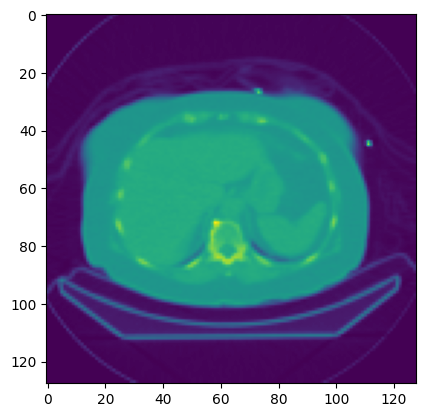

In [6]:
plt.imshow(images[63])